#The R$\ddot{\text{o}}$ssler system

The R$\ddot{\text{o}}$ssler system is an another example of chaotic system:
\begin{array}{l}  
\dot x  = - y -z \\
\dot y = x + a y \\
\dot z = b + z (x-c)
\end{array}

where $a, b, c > 0$
However, this is a simpler system than Lorenz system, as it is three-dimensional but it only has a single nonlinear term.

#Equlibiria or fixed points
Two cases are possible

* If $\boxed{c^2-4 a b >0}$ the system admits two fixed points
$$
x_{1,2}^*=\left(  \dfrac{c \mp \sqrt{c^2-4 a b}}{a},   \dfrac{- c \pm \sqrt{c^2-4 a b}}{2 a} ,  \dfrac{c \mp \sqrt{c^2-4 a b}}{2 a}   \right)
$$
*If $\boxed{c^2-4 a b <0}$ the system doesn't admit any fixed point.


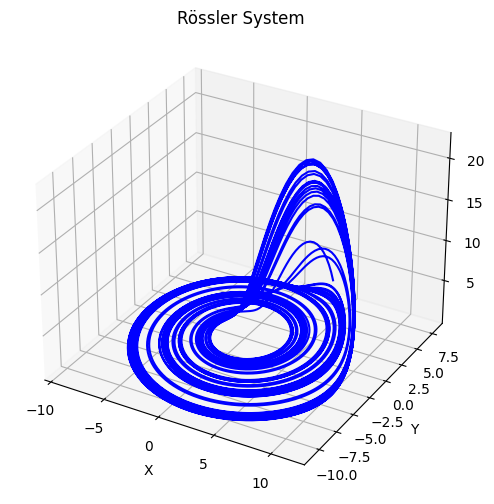

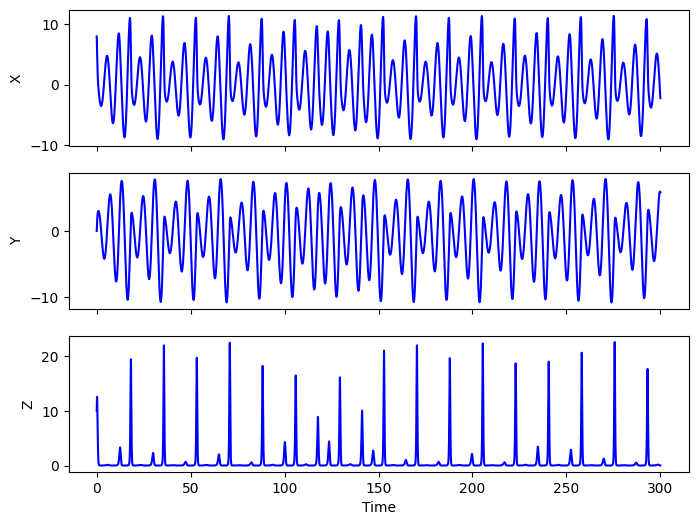

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the Rössler system ODE
def rossler(y, t, a, b, c):
    dydt = [
        -y[1] - y[2],
        y[0] + a * y[1],
        b + y[2] * (y[0] - c)
    ]
    return dydt

# Parameters
a = 0.2
b = 0.2
c = 5.7

# Initial condition
y0 = [8, 0, 10]

# Time points
t = np.linspace(0, 300, 10000)

# Solve the ODE
solution = odeint(rossler, y0, t, args=(a, b, c))

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution[:, 0], solution[:, 1], solution[:, 2], 'b')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rössler System')

# Create subplots for individual dimensions
fig, axs = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
axs[0].plot(t, solution[:, 0], 'b')
axs[0].set_ylabel('X')
axs[1].plot(t, solution[:, 1], 'b')
axs[1].set_ylabel('Y')
axs[2].plot(t, solution[:, 2], 'b')
axs[2].set_ylabel('Z')
axs[2].set_xlabel('Time')

plt.show()


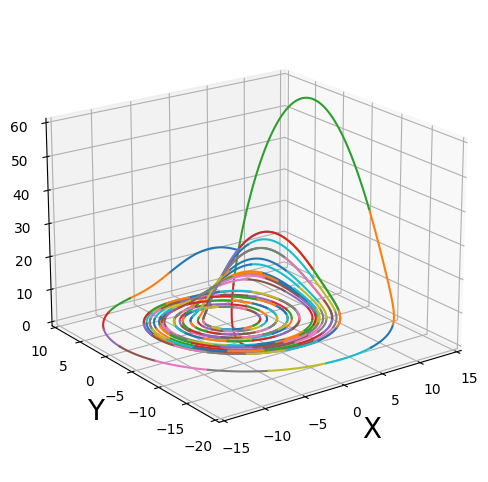

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Define the Rössler system ODE
def rossler(y, t, a, b, c):
    dydt = [
        -y[1] - y[2],
        y[0] + a * y[1],
        b + y[2] * (y[0] - c)
    ]
    return dydt

# Parameters
a = 0.2
b = 0.2
c = 5.7

# Initial conditions
y0 = [8, 9, 9.5]
ystart = y0.copy()

# Timestep data
tstep = 0.4
nstep = 400

# Create figure and axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-15, 15])
ax.set_ylim([-20, 10])
ax.set_zlim([0, 60])
ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('Z', fontsize=20)

# List to store frames
M = []

# creation and acquisition of frames
for i in range(nstep):
    tspan = np.linspace(0, tstep, 101)
    y = odeint(rossler, ystart, tspan, args=(a, b, c))
    ax.plot(y[:, 0], y[:, 1], y[:, 2])
    ystart = y[100]
    ax.view_init(elev=20, azim=6 * i)
    M.append(ax.get_figure())

# Create animation
ani = FuncAnimation(fig, animate, frames=nstep, interval=50, blit=True)

plt.show()


